In [3]:
import numpy as np
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd

In [4]:
server = '192.168.1.212'
database = 'master'
username = 'test'
password = 'tester2024'

mssql_conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};'

In [5]:
msql_query = f"""
        select *
        from ProjectNew..FullCompanyInfo
        """
print(msql_query)


        select *
        from ProjectNew..FullCompanyInfo
        


In [6]:
try:
    mssql_conn = pyodbc.connect(mssql_conn_str)
    print("Kết nối cơ sở dữ liệu thành công")
except pyodbc.Error as e:
    print(f"Lỗi khi kết nối cơ sở dữ liệu: {e}")

data = pd.read_sql_query(msql_query, mssql_conn)

mssql_conn.close()

Kết nối cơ sở dữ liệu thành công


C:\Users\vnmin\AppData\Local\Temp\ipykernel_31968\1879818091.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(msql_query, mssql_conn)


In [8]:
data.head(5)

,CompanyId,CompanyAge,CompanyType,FDI,CapitalAmount,NumberOfLabors,Region,FS11,FS12,FS13,...,FS16,FS17,FS18,FS19,FS20,FS21,FS22,FS23,FS24,Status
0,5AF6EED2-A25E-4AD8-896C-C518A119A9F0,7,SC,0,6.000000e+10,4.0,1,4.096244e+10,NaN,0.000000e+00,...,1.971150e+09,NaN,NaN,4.095611e+10,4.102185e+10,2.780123e+08,278012315.6,-1.014609e+08,-1.014609e+08,0
1,C4A8DA4E-9C19-4317-A815-BE441027F01D,14,SC,0,2.000000e+10,5.0,0,6.501376e+09,NaN,2.022720e+09,...,2.968588e+08,NaN,NaN,-6.166842e+09,6.705598e+09,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1
2,46307948-7631-461D-8C09-A20533A7D5E1,6,LLC1,0,3.000000e+09,3.0,1,2.991844e+09,NaN,0.000000e+00,...,1.457763e+08,NaN,NaN,2.991116e+09,2.992116e+09,0.000000e+00,0.0,-3.479970e+06,-3.479970e+06,1
3,C0878B22-3E1E-4B40-B75E-0F06F7596721,6,LLC1,0,9.900000e+09,1.0,1,7.764805e+09,NaN,2.988212e+09,...,5.058099e+08,NaN,NaN,2.792612e+09,7.932554e+09,5.367780e+09,352018358.0,-1.884156e+07,-2.462114e+07,1
4,95888AC7-77FC-4225-9927-2DECDB44DB2A,4,LLC1,0,5.000000e+08,10.0,1,4.099126e+08,NaN,0.000000e+00,...,2.582683e+07,NaN,NaN,4.036268e+08,4.124018e+08,4.334545e+07,43345454.5,-4.832296e+07,-4.832296e+07,0


In [9]:
print(data.columns)

Index(['CompanyId', 'CompanyAge', 'CompanyType', 'FDI', 'CapitalAmount',
       'NumberOfLabors', 'Region', 'FS11', 'FS12', 'FS13', 'FS14', 'FS15',
       'FS16', 'FS17', 'FS18', 'FS19', 'FS20', 'FS21', 'FS22', 'FS23', 'FS24',
       'Status'],
      dtype='object')


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235654 entries, 0 to 235653
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CompanyAge        235654 non-null  int64  
 1   FDI               235654 non-null  int64  
 2   CapitalAmount     235654 non-null  float64
 3   NumberOfLabors    235654 non-null  float64
 4   Region            235654 non-null  int64  
 5   FS11              234505 non-null  float64
 6   FS12              152678 non-null  float64
 7   FS13              233218 non-null  float64
 8   FS14              232164 non-null  float64
 9   FS15              234126 non-null  float64
 10  FS16              235654 non-null  float64
 11  FS17              138701 non-null  float64
 12  FS18              137349 non-null  float64
 13  FS19              235599 non-null  float64
 14  FS20              235607 non-null  float64
 15  FS21              233707 non-null  float64
 16  FS22              23

In [21]:
data.describe()

,CompanyAge,FDI,CapitalAmount,NumberOfLabors,Region,FS11,FS12,FS13,FS14,FS15,FS16,FS17,FS18,FS19,FS20,FS21,FS22,FS23,FS24,Status
count,235654.000000,235654.000000,2.356540e+05,235654.000000,235654.000000,2.345050e+05,1.526780e+05,2.332180e+05,2.321640e+05,2.341260e+05,2.356540e+05,1.387010e+05,1.373490e+05,2.355990e+05,2.356070e+05,2.337070e+05,2.325080e+05,2.353200e+05,2.353140e+05,235654.000000
mean,7.600401,0.017314,7.252910e+10,22.669095,0.627335,6.902294e+10,5.049268e+10,1.175980e+10,4.856951e+10,6.290303e+10,6.839021e+09,3.729095e+10,2.755489e+10,5.429386e+10,1.164142e+11,5.628352e+10,7.855583e+09,3.585732e+09,2.816793e+09,0.795560
std,5.607946,0.130437,8.970524e+11,320.728846,0.483515,1.888009e+12,1.049868e+12,2.289845e+11,1.856772e+12,1.842798e+12,2.096733e+11,1.960833e+12,1.934474e+12,1.993913e+12,3.219539e+12,2.435128e+12,6.783136e+11,7.144231e+11,5.833325e+11,0.403292
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-5.518558e+13,-3.807588e+13,-8.350439e+12,-1.761916e+13,-4.972508e+13,-4.431930e+12,-1.205991e+13,-4.488948e+12,-6.194874e+13,-7.280474e+13,-5.125192e+13,-7.778313e+12,-6.897430e+13,-6.897430e+13,0.000000
25%,4.000000,0.000000,3.000000e+09,3.000000,0.000000,1.800000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.223099e+08,0.000000e+00,0.000000e+00,1.403606e+09,1.990177e+09,0.000000e+00,0.000000e+00,-6.360707e+07,-6.585093e+07,1.000000
50%,6.000000,0.000000,9.800000e+09,5.000000,1.000000,6.544688e+09,5.010641e+08,0.000000e+00,1.453749e+07,1.299002e+08,5.003662e+08,0.000000e+00,0.000000e+00,5.009940e+09,8.040449e+09,2.155229e+08,2.476314e+07,-3.238887e+06,-3.422482e+06,1.000000
75%,9.000000,0.000000,2.400000e+10,9.000000,1.000000,2.000000e+10,8.314366e+09,6.059654e+08,1.173678e+09,4.228423e+09,1.642830e+09,9.756828e+07,0.000000e+00,1.972674e+10,2.498571e+10,4.480826e+09,4.472746e+08,0.000000e+00,0.000000e+00,1.000000
max,35.000000,1.000000,2.053900e+14,65448.000000,1.000000,7.731032e+14,3.570915e+14,5.323964e+13,7.208822e+14,7.530833e+14,6.411004e+13,6.796658e+14,6.747213e+14,8.210365e+14,9.413105e+14,6.131812e+14,2.255790e+14,3.095936e+14,2.479734e+14,1.000000


In [17]:
data.isnull().sum()


CompanyAge              0
FDI                     0
CapitalAmount           0
NumberOfLabors          0
Region                  0
FS11                 1149
FS12                82976
FS13                 2436
FS14                 3490
FS15                 1528
FS16                    0
FS17                96953
FS18                98305
FS19                   55
FS20                   47
FS21                 1947
FS22                 3146
FS23                  334
FS24                  340
Status                  0
CompanyType_LLC2        0
CompanyType_PE          0
CompanyType_SC          0
dtype: int64

Độ lệch của CompanyAge: 1.40
Độ nhọn của CompanyAge: 1.53


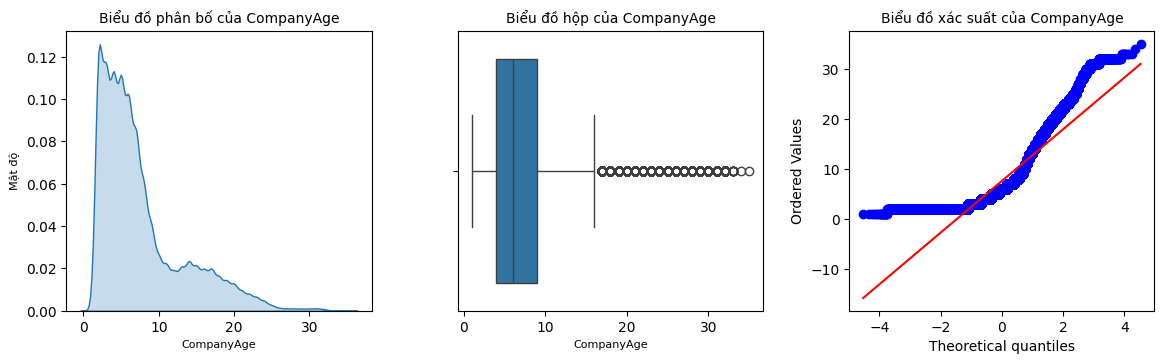

Độ lệch của CapitalAmount: 121.37
Độ nhọn của CapitalAmount: 21148.62


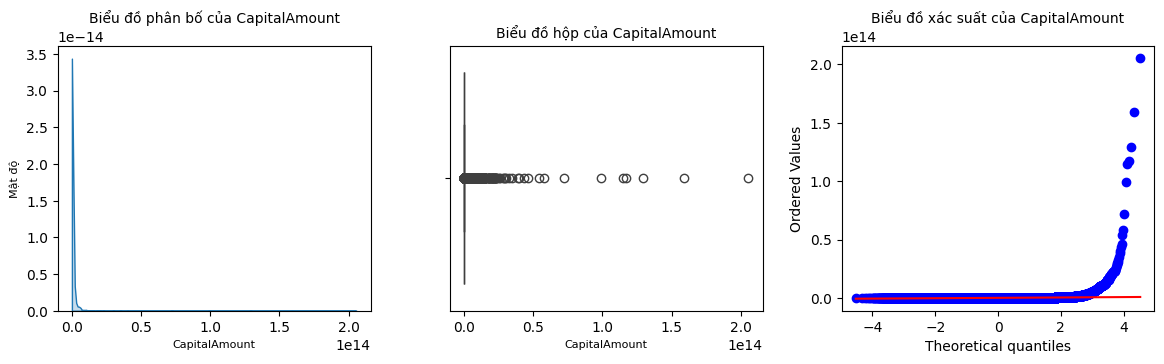

Độ lệch của NumberOfLabors: 93.45
Độ nhọn của NumberOfLabors: 13730.04


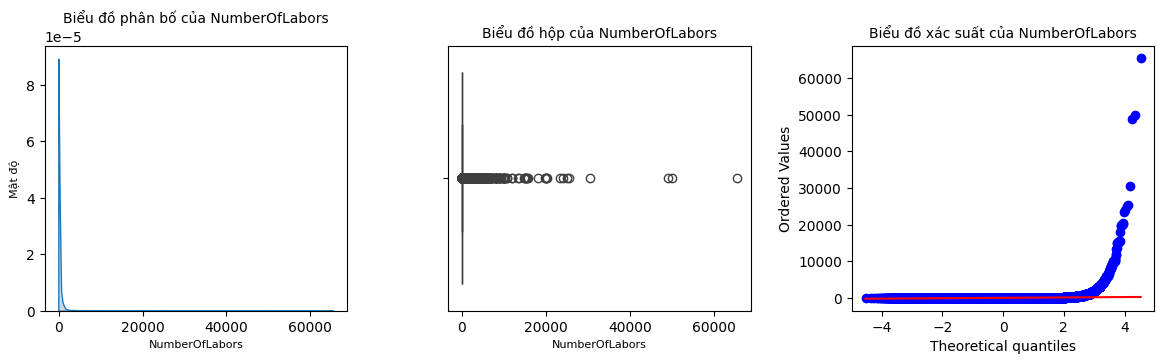

Độ lệch của FS11: 314.39
Độ nhọn của FS11: 122107.03


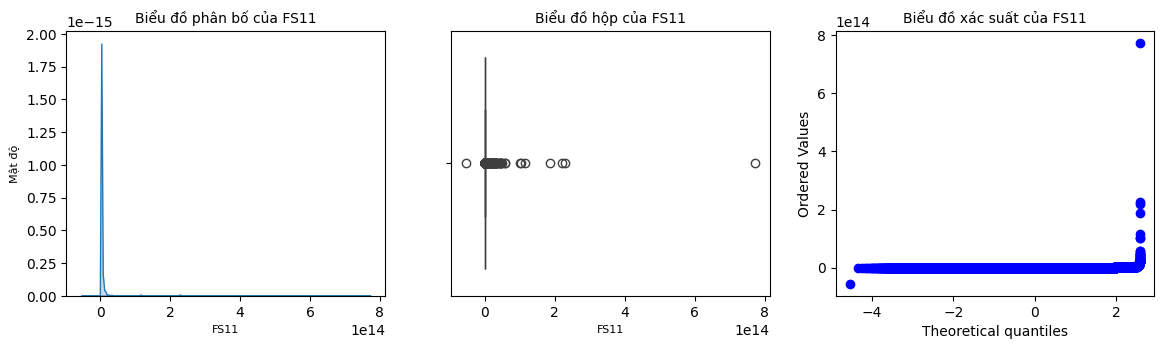

Độ lệch của FS12: 265.98
Độ nhọn của FS12: 88120.57


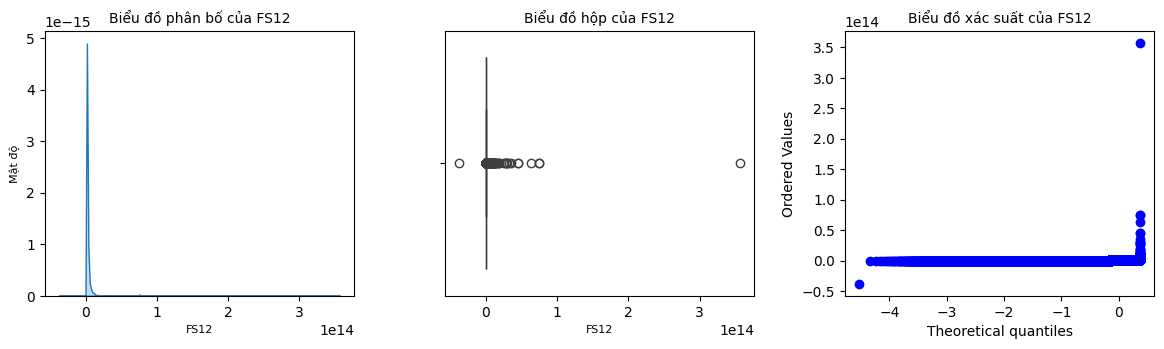

Độ lệch của FS13: 118.53
Độ nhọn của FS13: 21018.00


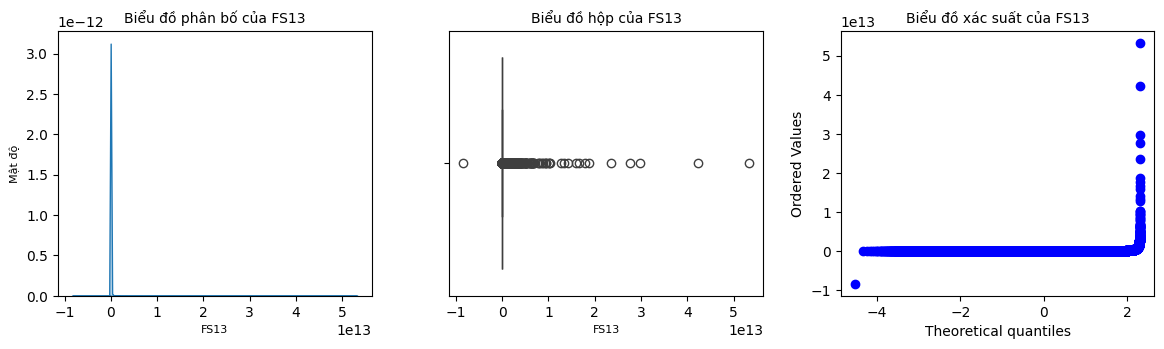

Độ lệch của FS14: 286.29
Độ nhọn của FS14: 102441.29


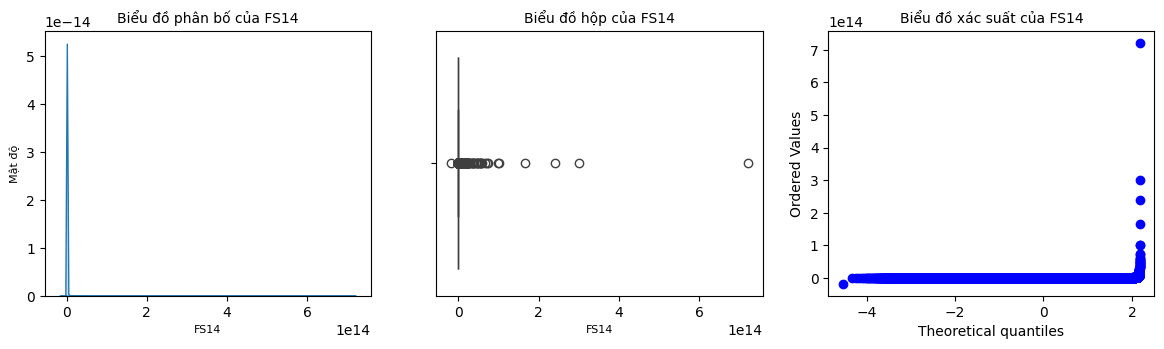

Độ lệch của FS15: 310.89
Độ nhọn của FS15: 121219.64


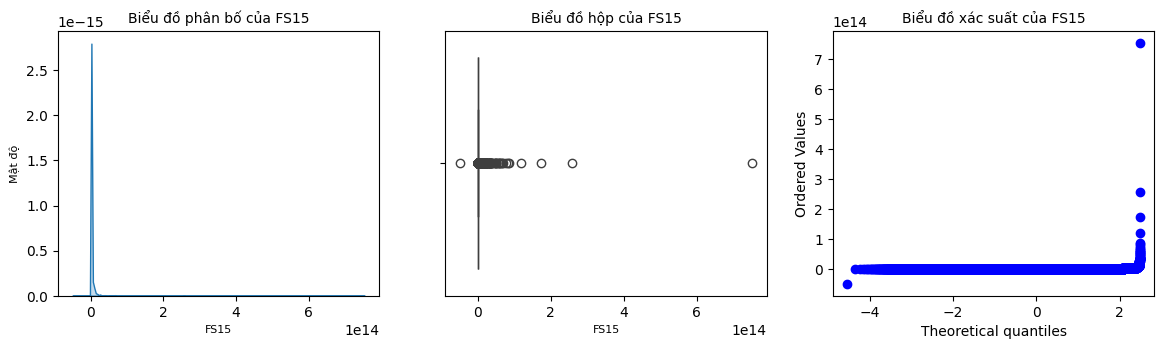

Độ lệch của FS16: 233.28
Độ nhọn của FS16: 64552.04


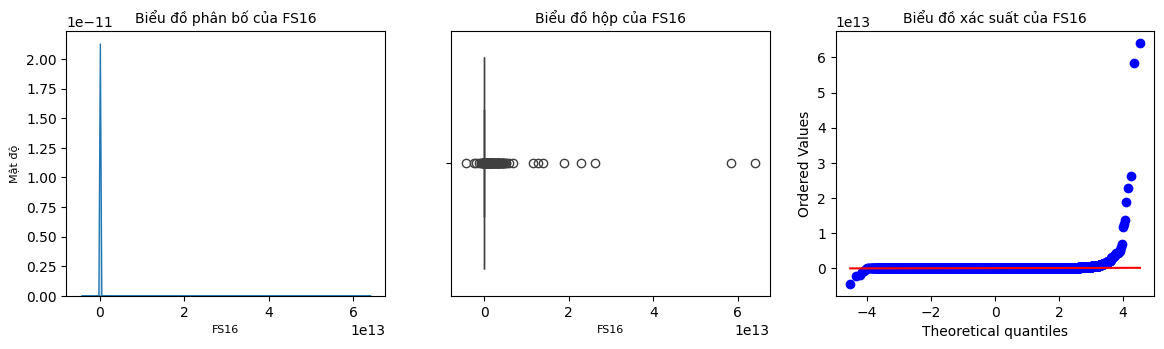

Độ lệch của FS17: 306.76
Độ nhọn của FS17: 104507.83


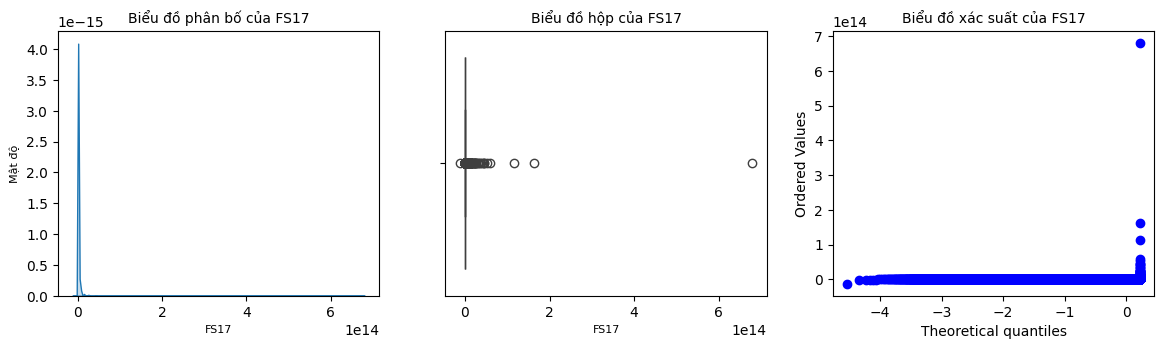

Độ lệch của FS18: 315.37
Độ nhọn của FS18: 108209.18


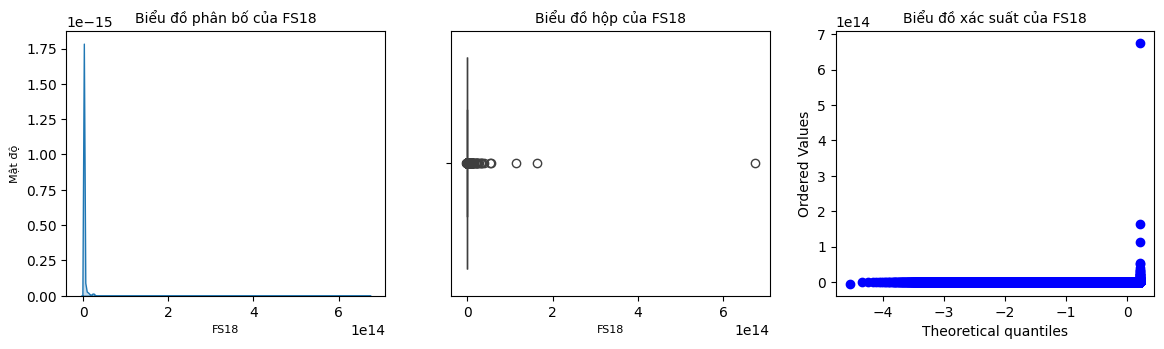

Độ lệch của FS19: 316.30
Độ nhọn của FS19: 123844.95


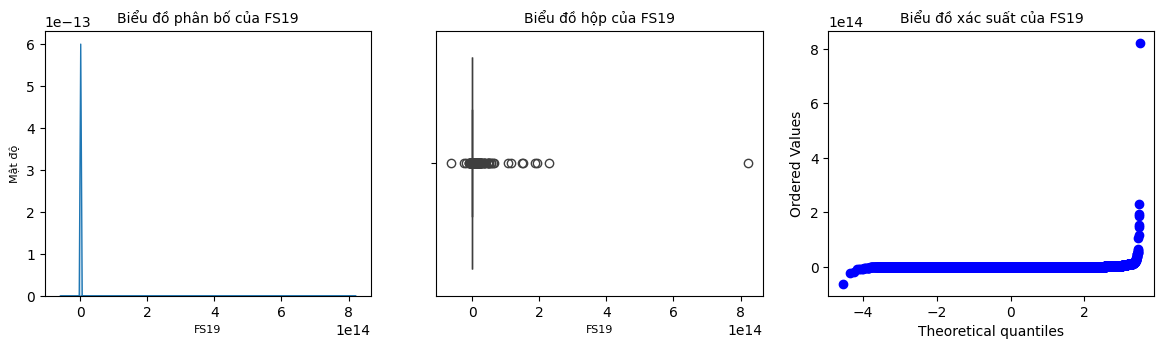

Độ lệch của FS20: 229.78
Độ nhọn của FS20: 63458.81


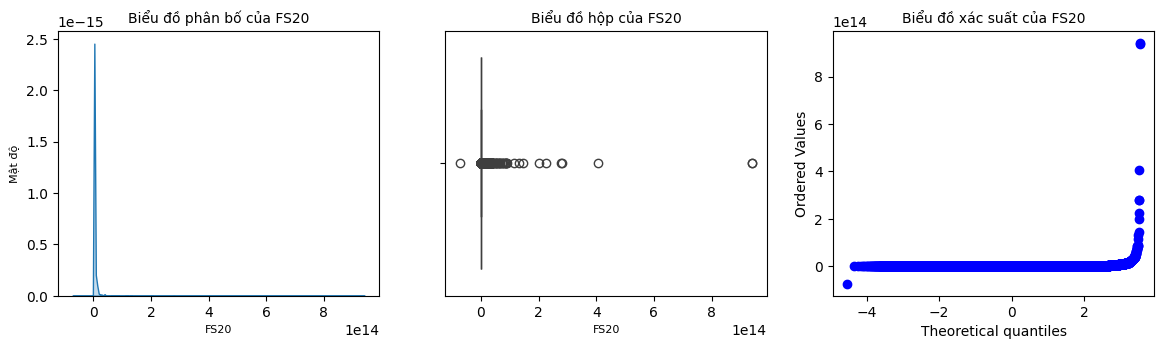

Độ lệch của FS21: 190.42
Độ nhọn của FS21: 41030.31


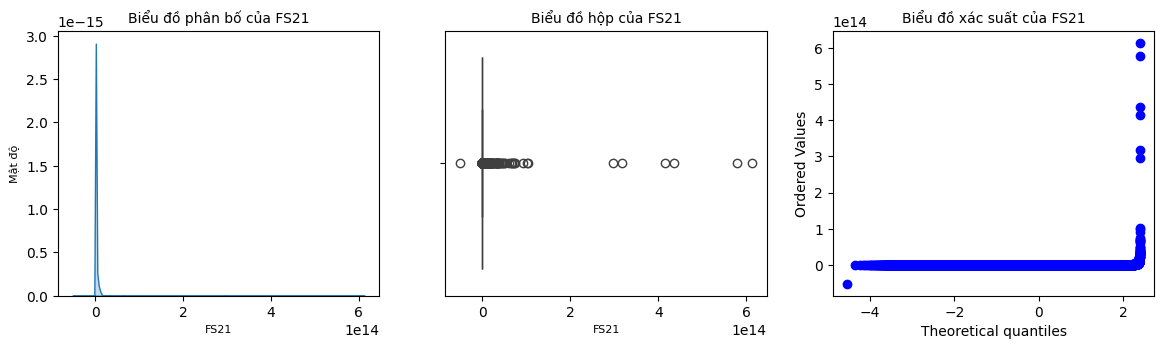

Độ lệch của FS22: 274.02
Độ nhọn của FS22: 82984.80


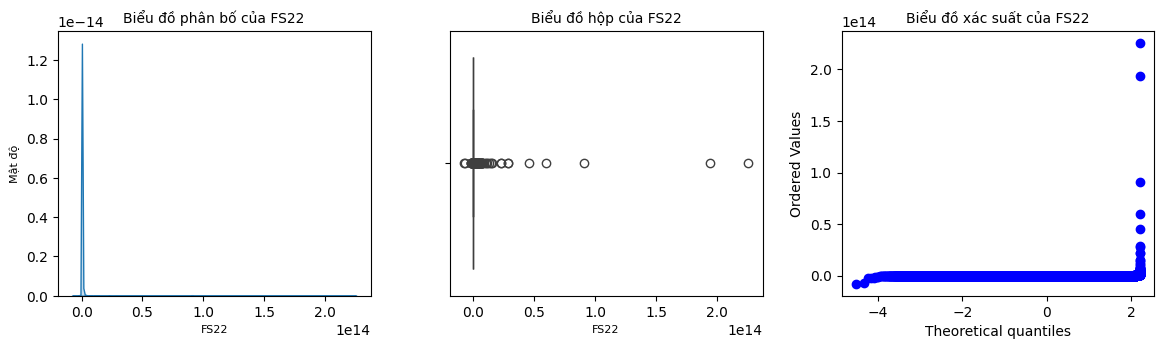

Độ lệch của FS23: 360.48
Độ nhọn của FS23: 152822.23


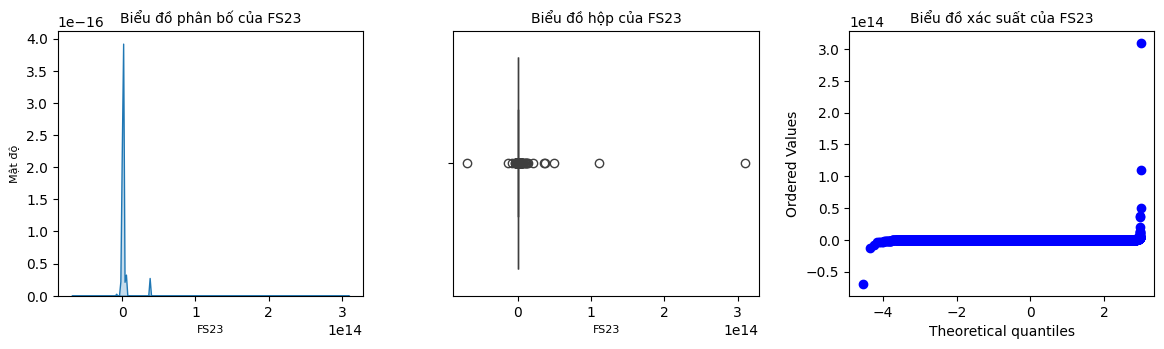

Độ lệch của FS24: 338.05
Độ nhọn của FS24: 142094.11


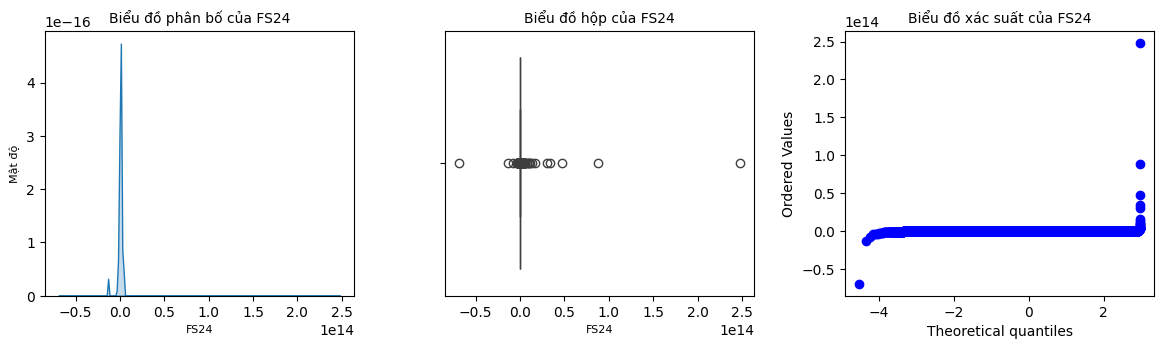

Độ lệch của CompanyType_LLC2: 1.12
Độ nhọn của CompanyType_LLC2: -0.74


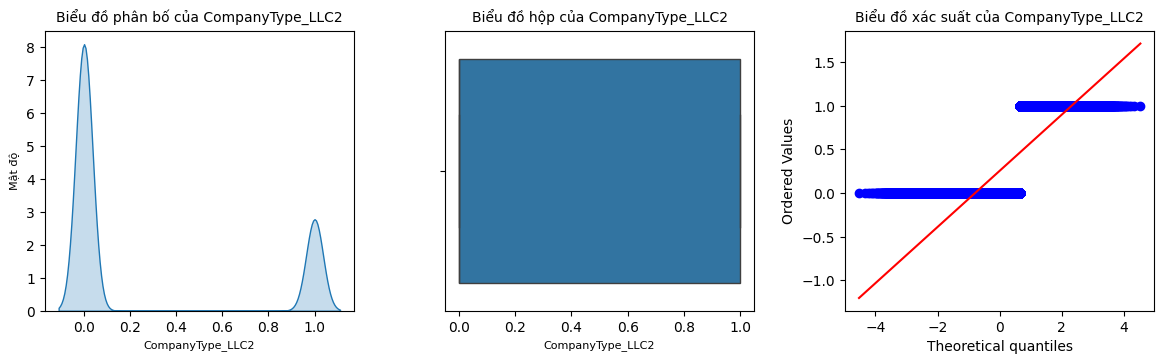

Độ lệch của CompanyType_PE: 14.42
Độ nhọn của CompanyType_PE: 205.98


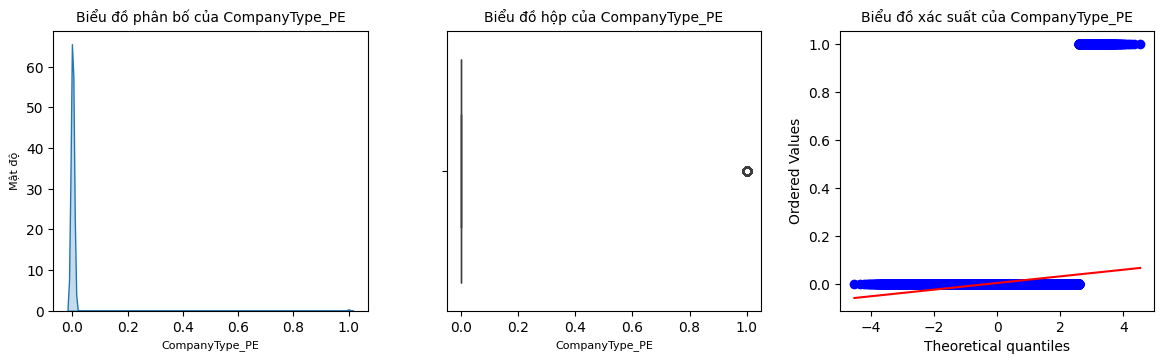

Độ lệch của CompanyType_SC: 0.63
Độ nhọn của CompanyType_SC: -1.61


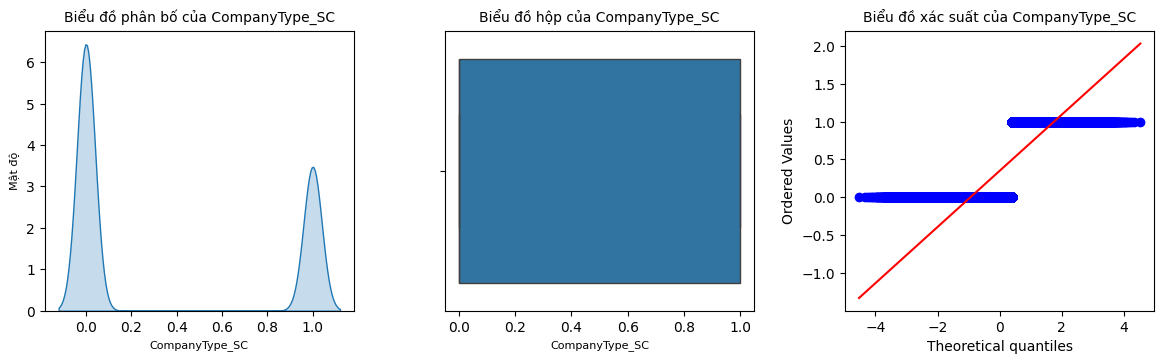

In [20]:
exclude_columns = ['CompanyId', 'CompanyType', 'FDI', 'Region', 'Status']

# Vẽ các biểu đồ cho các cột không bị loại trừ
for column in data.columns:
    if column not in exclude_columns:
        skewness = data[column].skew()
        kurtosis = data[column].kurtosis()
        
        print(f"Độ lệch của {column}: {skewness:.2f}")
        print(f"Độ nhọn của {column}: {kurtosis:.2f}")
        
        plt.figure(figsize=(12, 4))  # Giảm kích thước figure

        # Biểu đồ phân bố
        plt.subplot(1, 3, 1)
        sns.kdeplot(data[column], fill=True)
        plt.title(f'Biểu đồ phân bố của {column}', fontsize=10)
        plt.xlabel(column, fontsize=8)
        plt.ylabel('Mật độ', fontsize=8)

        # Biểu đồ hộp
        plt.subplot(1, 3, 2)
        sns.boxplot(x=data[column])
        plt.title(f'Biểu đồ hộp của {column}', fontsize=10)
        plt.xlabel(column, fontsize=8)

        # Biểu đồ xác suất
        plt.subplot(1, 3, 3)
        stats.probplot(data[column], dist="norm", plot=plt)
        plt.title(f'Biểu đồ xác suất của {column}', fontsize=10)

        plt.tight_layout(pad=2.0)  # Tăng khoảng cách giữa các subplot
        plt.show()

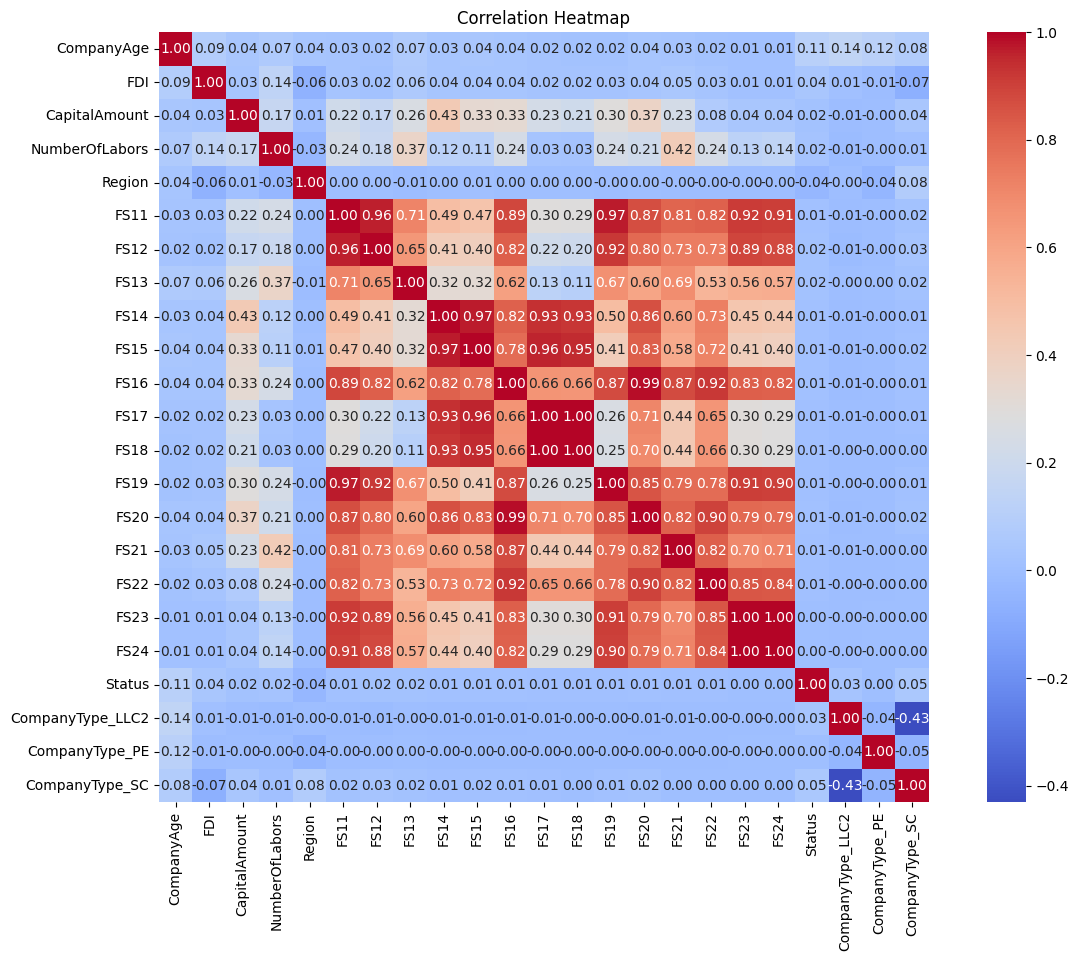

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử bạn đã có dataframe 'data'
# data = pd.read_csv('your_data.csv')

# Loại bỏ cột đầu tiên
data = data.iloc[:, 1:]

# Chuyển các biến định tính sang dạng số nếu cần thiết
data = pd.get_dummies(data, columns=['CompanyType'], drop_first=True)

# Tính ma trận tương quan
corr = data.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()


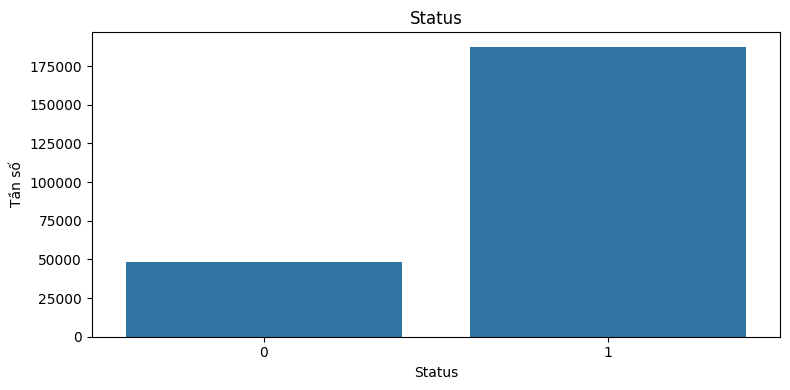

In [25]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Status', data=data)
plt.title('Status')
plt.xlabel('Status')
plt.ylabel('Tần số')
plt.tight_layout()
plt.show()
plt.close('all')